In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

https://drive.google.com/file/d/1H5-RmT6SsQigEcnc9WnOYAthIEd7P-Yu/view

In [1]:
!gdown --id 1H5-RmT6SsQigEcnc9WnOYAthIEd7P-Yu -O V1.csv

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1H5-RmT6SsQigEcnc9WnOYAthIEd7P-Yu
To: /content/V1.csv
100% 2.34M/2.34M [00:00<00:00, 158MB/s]


Which dataset are you using for this exam?

In [4]:
df = pd.read_csv('V1.csv', sep =',')

In [5]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,IncomeGroup
0,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States,<=50K
1,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K
2,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K
3,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
4,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


How many total number of rows and columns are there in the dataset?


In [6]:
df.shape

(20000, 15)

Is there any Missing values in the given dataset ?


In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
IncomeGroup       0
dtype: int64

Check all " ?" symbol in the dataset and replace it with "np.nan" value . Which of the columns in the dataset have null values?

In [12]:
(df[df.columns] == ' ?').sum()

age                  0
workclass         1137
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1140
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     354
IncomeGroup          0
dtype: int64

In [15]:
question_mark = ['workclass', 'occupation', 'native-country']
for col in question_mark:
  df[col].replace(" ?", np.NaN, inplace = True)

In [16]:
df.isna().sum()

age                  0
workclass         1137
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1140
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     354
IncomeGroup          0
dtype: int64

What fraction of total samples (in percentage) have missing value in occupation column?

In [19]:
df['occupation'].isna().sum()/df['occupation'].value_counts().sum()

0.060445387062566275

What fraction of total samples(In percentage) have income <= 50k in the given dataset? (round the value upto 2 decimal places)

In [27]:
(df['IncomeGroup'].value_counts()[0]/ df['IncomeGroup'].value_counts().sum())*100

76.51

What is the mean age of the samples given in the dataset(mark the closest integer from the given options)?


In [28]:
df['age'].mean()

38.553

How many people have completed their education upto "Preschool" only ?


In [30]:
df['education'].value_counts()

 HS-grad         6477
 Some-college    4458
 Bachelors       3279
 Masters         1039
 Assoc-voc        826
 11th             718
 Assoc-acdm       662
 10th             579
 7th-8th          403
 Prof-school      353
 9th              322
 12th             270
 Doctorate        257
 5th-6th          223
 1st-4th          102
 Preschool         32
Name: education, dtype: int64

What is the correlation cofficient between column "education-num" and column "capital-gain" ?


[]

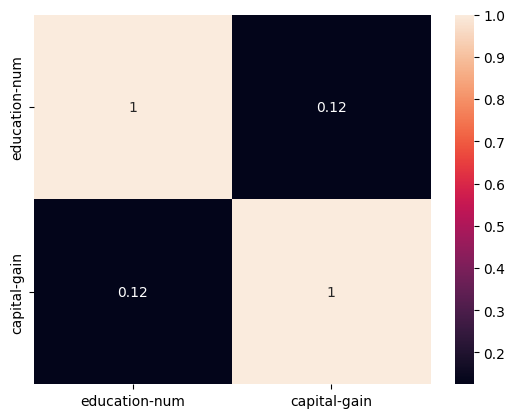

In [33]:
sns.heatmap(df[["education-num", "capital-gain"]].corr(), annot = True)
plt.plot()


SimpleImputer with strategy = 'most_frequent' to replace all NaN value by mode of respective column in the original dataset.(Use this updated dataset only for all further questions)

In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df1 = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [44]:
df1.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,IncomeGroup
0,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States,<=50K
1,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K
2,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K
3,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
4,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


In [45]:
df1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
IncomeGroup       0
dtype: int64

What is the mode of 'occupation' column of updated datset?


In [47]:
df.occupation.mode()

0     Prof-specialty
Name: occupation, dtype: object

In [48]:
df.occupation.value_counts()

 Prof-specialty       2523
 Craft-repair         2510
 Exec-managerial      2497
 Adm-clerical         2352
 Sales                2229
 Other-service        2062
 Machine-op-inspct    1198
 Transport-moving      977
 Handlers-cleaners     851
 Farming-fishing       607
 Tech-support          570
 Protective-serv       392
 Priv-house-serv        86
 Armed-Forces            6
Name: occupation, dtype: int64

Split the dataset into X1, X2 and y, where 
1. X1 contains all Numerical features, 
2. X2 contains all categorical features(except "IncomeGroup") and save 3. 'IncomeGroup' column in y variable. 
4. Then apply OneHotEncoder on the categorical features(X2) with option (sparse = False) and 
5. StandardScaler on the numerical features (X2).


In [69]:
cat_features = []
num_features = []
for col in df.columns:
  if df[col].dtype == 'O':
    cat_features.append(col)
  else:
    num_features.append(col)

In [72]:
# categorical features
X2 = df1[cat_features]

#numerical features:
X1 = df1[num_features].astype(float)

# target column
y = X2['IncomeGroup']

# drop from X2
X2.drop(labels = ['IncomeGroup'], axis = 1, inplace = True)

<ipython-input-72-58442ef0f40c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2.drop(labels = ['IncomeGroup'], axis = 1, inplace = True)


In [77]:
X1.shape, X2.shape

((20000, 6), (20000, 8))

Apply StandardScaler on the X1 data and OneHotEncoder on X2 data with option (sparse = False).

In [78]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

encoder = OneHotEncoder(sparse = False)
X2_encoded = encoder.fit_transform(X2)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


What are the data types of X1 and X2?


In [85]:
type(X1_scaled), type(X2_encoded)

(numpy.ndarray, numpy.ndarray)

Concatenate X1 and X2 and call it X( Keep axis = 1) and then Convert X to a dataframe.
What is the new shape of resultant X?

In [102]:
X = np.c_[X1_scaled, X2_encoded]

## same can be done using

## X = np.concatenate((X1_scaled, X2_encoded), axis = 1)

In [106]:
X = pd.DataFrame(X)
X.shape

(20000, 105)

Split the dataset into training and validation dataset into 80:20 ratio while keeping random_state =64. what is the shape of the y_train dataset?

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 64)

In [108]:
y_train.shape

(16000,)


1 point
Instantiate a perceptron classifier that with following parameters:-
Fit the intercept
Put warm start to be False
Fit this perceptron model with the training dataset and calculate the accuracy score for training data. Which of the following option matches with the score?

In [109]:
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True,
                   warm_start = False)

model.fit(x_train, y_train)

Perceptron()

In [110]:
model.score(x_train, y_train)

0.813

Create a new Perceptron object with given settings in the instrunctions and train it on training set . What is the value of bias (intercept) (upto 1 decimal point) ?
Set early stopping and fit interceptto be True
Put warm start to be False

In [111]:
model2 = Perceptron(early_stopping=True,
                    fit_intercept=True,
                    warm_start = False)
model2.fit(x_train, y_train)
model2.intercept_

array([-6.])

Use SGDClassifier on the training dataset (X_train and y_train) to train the model. Use the following parameters:

* log is the loss function to be used
* apply ridge regularization,
* maximum number of passes over the training data is 10
* initial learning rate is 0.01,
* regularization rate value is 0.001,
* learning rate should not change during training.
* Take random_state=64.
* Set warm_state as False

Note : Please ignore the convergence warning.

In [112]:
from sklearn.linear_model import SGDClassifier
model3 = SGDClassifier(penalty='l2',
                       loss = 'log',
                       alpha = 0.001,
                       max_iter = 10,
                       eta0 = 0.01,
                       random_state = 64,
                       warm_start = False,
                       learning_rate = 'constant'
                       )
model3.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=10, random_state=64)

In [113]:
model3.score(x_train, y_train)

0.8510625

Take LogisticRegression estimator with following parameters for fitting on the training dataset:

Use sag as solver
Set random state to be equal to 64
Tolerance for stopping criteria to be 1e-3
Maximum number of iterations taken for the solvers to converge to be 100

Enter the recall score you got for the given model (Take average as macro).

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
model4 = LogisticRegression(
    solver= 'sag',
    random_state = 64,
    tol=1e-3,
    max_iter = 100
)
model4.fit(x_train, y_train)

y_pred4 = model4.predict(x_test)
recall_score(y_test, y_pred4, average = 'macro')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7528715724863027

In [119]:
np.unique(y_pred4)

array([' <=50K', ' >50K'], dtype=object)

In [120]:
np.unique(y_test)

array([' <=50K', ' >50K'], dtype=object)

Use Gridsearchcv with KNeighborsClassifier() being the estimator, accuracy as scoring parameter, cv value as 4 and consider [1,3,5,7] as "number of neighbors" to be examined.

Consider following parameters for KNeighborsClassifier():

Take metric as 'minkowski',
Set P value as 2

Keep other parameter values as default value.

What is the best value of K you obtained using above instruction?

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define the hyperparameters to search over
param_grid = {'n_neighbors': [1, 3, 5, 7],
              'metric': ['minkowski'],
              'p': [2]}

# create the classifier
clf = KNeighborsClassifier()

# create the grid search object
grid = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=4)

# fit the grid search object to the training data
grid.fit(x_train, y_train)

# print the best hyperparameters
print("Best value of K: {}".format(grid.best_params_['n_neighbors']))

Best value of K: 7


In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# define the hyperparameters to search over
param_grid = {'criterion': ['entropy', 'gini'],
              'splitter': ['random', 'best'],
              'min_samples_leaf': [2, 4, 6, 8, 10],
              'max_depth': [3, 4, 5, 6]}

# create the classifier
clf = DecisionTreeClassifier(random_state=64,)

# create the grid search object
grid = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=4)

# fit the grid search object to the training data
grid.fit(x_train, y_train)

# evaluate the performance of the best model on the test data
score = grid.score(x_test, y_test)

# print the score
print("Score on testing set: {:.2f}".format(score))

Score on testing set: 0.85


In [124]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'splitter': 'best'}

In [126]:
grid.best_estimator_.tree_.node_count

75

Take RandomForestClassifier (random state to be 64) with GridSearchCV to tune the number of decision trees with training set. The number of trees in forest can range from 5 to 10 (both inclusive). Mark the number of decision trees that will produce the best score on the training data.

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# create a random forest classifier
rf = RandomForestClassifier(random_state=64)

# define the parameter grid to search over
param_grid = {'n_estimators': range(5, 11)}

# create a GridSearchCV object
grid = GridSearchCV(rf, param_grid, cv=4, scoring='accuracy')

# fit the GridSearchCV object to the training data
grid.fit(x_train, y_train)

# print the best number of trees
print("Best number of trees: ", grid.best_params_['n_estimators'])

Best number of trees:  10


Take an adaboost model with following hyperparameter values and tune it using GridsearchCV.
Use n_estimators as [10,20,30]
random_state = 64
Use learning_rate as [0.5,1,2]
Take cv value= 4
Train the 'model' using above instructions and enter the 'accuracy score' (up to 3 decimal points) on the test data.

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# create an AdaBoost classifier
ada = AdaBoostClassifier(random_state=64)

# define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.5, 1, 2]
}

# create a GridSearchCV object
grid = GridSearchCV(ada, param_grid, cv=4, scoring='accuracy')

# fit the GridSearchCV object to the training data
grid.fit(x_train, y_train)

# get the best model
best_model = grid.best_estimator_

# calculate accuracy score on the test data
accuracy = best_model.score(x_test, y_test)

# print the accuracy score
print("Accuracy on test data:", round(accuracy, 3))

Accuracy on test data: 0.853


Enter the value of best n_estimators of the model after training with GridSearchCV.


In [133]:
# get the best parameters
best_params = grid.best_params_

# print the best n_estimators
print("Best n_estimators:", best_params['n_estimators'])

Best n_estimators: 30


Apply GridsearchCV and support vector machine (SVM)(kernel':('linear', 'rbf'), 'C':[1, 10]) on the training dataset X_train, y_train and calculate the best value of C and kernel. Which of the following options represent the best parameters. (Keep patience: It is common if it takes arround 5 min to complete the run.)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [1, 10], 'kernel': ['linear', 'rbf']}

svm = SVC()
svm_grid = GridSearchCV(svm, param_grid=param_grid, scoring='accuracy', cv=5)
svm_grid.fit(x_train, y_train)

best_params = svm_grid.best_params_
print(best_params)